# <font color='#2F4F4F'>1. Defining the Question</font>

## a) Specifying the Data Analysis Question

What is the question or problem you are trying to solve?

# Problem Statement
Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more
drivers during peak hours, we need to predict the number of taxi orders for the next hour. Build a
model for such a prediction.



## b) Defining the Metric for Success

How will you know your project has succeeded?

The RMSE metric on the test set should not be more than 48.


## c) Understanding the context 

What is the background information surrounding the research question?

# Background Information
Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the number of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## d) Recording the Experimental Design

What steps will you take to answer the research question?

# Methodology

I will be required to go through the following stages
Defining the Research Question

*Defining the Research Question

● Data Importation

● Data Exploration

● Data Cleaning

● Data Analysis (Univariate and Bivariate)

● Data Preparation

● Data Modeling

● Model Evaluation

● Challenging your Solution

● Recommendations / Conclusion








## e) Data Relevance

Is the data provided relevant to the research question?

The data we have contains data which will be critical for our research specific analysis.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation </font>

In [ ]:
# load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# load and preview dataset
df = pd.read_csv(
    '/content/taxi.csv', index_col=[0], parse_dates=[0]
)
df.sort_index(inplace=True)
df = df.resample('1h').sum()

In [ ]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [ ]:
df.shape

(4416, 1)

In [ ]:
df.nunique().sort_values()

num_orders    251
dtype: int64

In [ ]:
df.dtypes

num_orders    int64
dtype: object

In [ ]:
# check for missing values
df.isna().sum()

num_orders    0
dtype: int64

In [ ]:
#Checking the unique values in each variable just to be safe there are no remaining missing values
columns = df.columns

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: num_orders
Number of unique values: 251
[124  85  71  66  43   6  12  15  34  69  64  96  30  32  48  44  73  45
  61 113  58  90 120  75  20  11   7  46  54  91  36  59  82  83  89  49
  93 101 119  72 163 108  25   9  17  56  52  57  28  41  76  68  63  60
  26  42  27  22  39  19  51  80  77  86 176  16   3  14  31  50  62  37
  40  47  10  81 100 121  24  38  55  99 127  94 143  78  65  97 114  88
  79  84  29   1   4  70 117   5  18  53 102  33 107 118 153 105  67  35
 109  21   8 123 110 134 133 137 126  13  74  95 139  87 106  92 148 182
 104 131  98   2 112 103 128 166 111  23   0 129 164 165 138 142 159 115
 130 135 150 167 147 253 140 172 116 125 162 201 136 146 154 145 155 158
 156 193 197 234 157 122 144 149 171 152 174 186 132 194 183 188 229 173
 185 161 151 190 192 184 160 203 180 141 168 224 187 251 198 245 222 213
 195 215 178 177 216 223 179 170 169 248 204 230 196 211 212 249 226 175
 273 437 231 219 214 202 191 281 254 210 200 272 462 239 240 205 247 242
 

No missing values

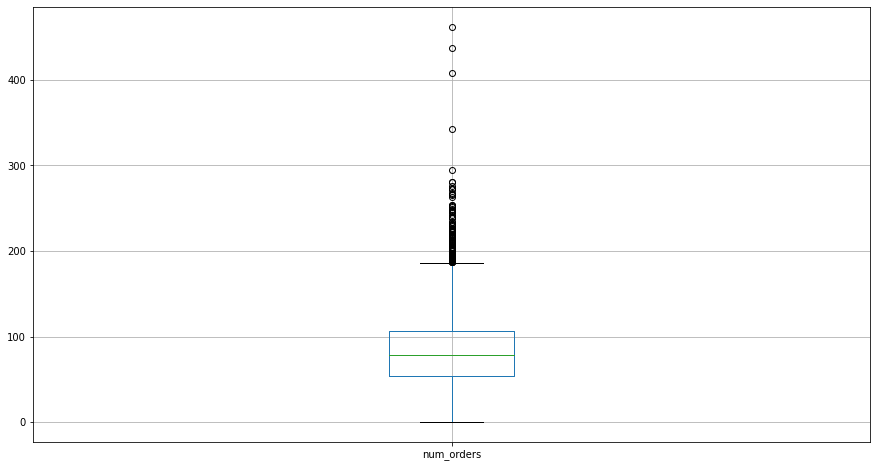

In [ ]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot()
plt.show()

In [ ]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(121, 1)


,num_orders
datetime,
2018-08-27 02:00:00,408
2018-08-31 01:00:00,194
2018-07-28 00:00:00,192


In [ ]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

2.74

2% is a fairly small number of records to drop the outliers

# <font color='#2F4F4F'>3. Data Analysis </font>

In [ ]:
#We will get the summary statistics
df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


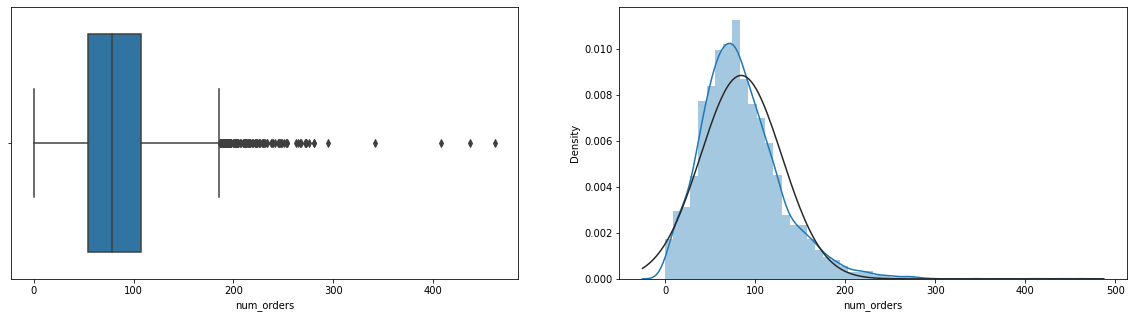

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(df["num_orders"], ax=ax[0])
sns.distplot(df["num_orders"], fit=norm, ax=ax[1])

Number of orders has a normal distribution with several outliers

# <font color='#2F4F4F'>4. Data Modeling</font>



In [ ]:
# splitting into 80-20 train-test sets

#split data set
train, test = train_test_split(df, shuffle=False, test_size=0.2)

#confirm size of datasets
print(df.shape)
print(train.shape)
print(test.shape)

(4416, 1)
(3532, 1)
(884, 1)


In [ ]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 00:00:00 2018-07-26 03:00:00
2018-07-26 04:00:00 2018-08-31 23:00:00


The training set starts on March 3, 2018, and ends on July 26, 2018, and the
 
test begins on July 26,2018 to August 31, 2018.

In [ ]:
#using a constant value: median level of taxi orders so that you can correlate it with the MAE metric value
print('Median daily taxi orders:', test['num_orders'].median())
pred_median = np.ones(test.shape) * train['num_orders'].median()
print('MAE:', mean_absolute_error(test, pred_median))

Median daily taxi orders: 120.0
MAE: 59.43778280542986


In [ ]:
#using the previous value in the series to  predict the taxi orders and find the MAE value for this prediction.
print('Median daily taxi orders:', test['num_orders'].median())

pred_previous = test.shift()

pred_previous.iloc[0] = train.iloc[-1]
print('MAE:', mean_absolute_error(test, pred_previous))

#10%
# With this forecast, the model's accuracy increases, and the model is sanity-checked, 

Median daily taxi orders: 120.0
MAE: 40.671945701357465


In [ ]:
#creating features

def make_features(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['week'] = df.index.week
    df['is_weekend'] = df.dayofweek.isin([5,6])*1
    df['hour'] = df.index.hour


make_features(df)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


,num_orders,year,month,day,dayofweek,week,is_weekend,hour
datetime,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,9,0,0
2018-03-01 01:00:00,85,2018,3,1,3,9,0,1
2018-03-01 02:00:00,71,2018,3,1,3,9,0,2
2018-03-01 03:00:00,66,2018,3,1,3,9,0,3
2018-03-01 04:00:00,43,2018,3,1,3,9,0,4


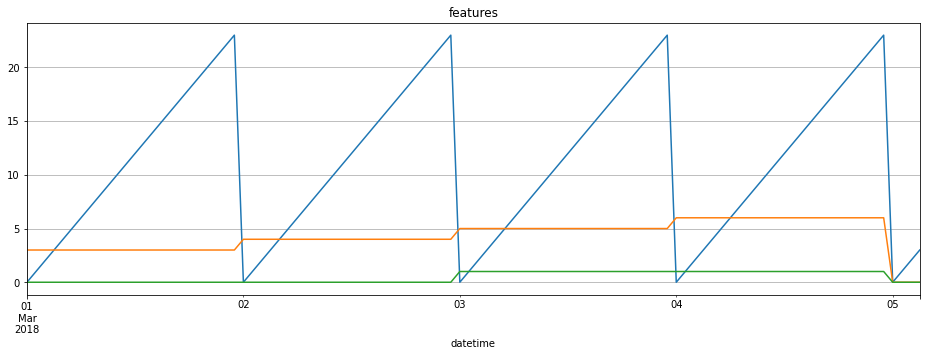

In [ ]:
#Plotting features
plt.figure(figsize=(16, 5))
plt.title("features")
df[:100].hour.plot()
df[:100].dayofweek.plot()
df[:100].is_weekend.plot()
plt.grid(True);

In [ ]:
#Calculating Lag values

def make_features(df, max_lag):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['week'] = df.index.week
    df['is_weekend'] = df.dayofweek.isin([5,6])*1
    df['hour'] = df.index.hour

    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)



make_features(df, 4)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


,num_orders,year,month,day,dayofweek,week,is_weekend,hour,lag_1,lag_2,lag_3,lag_4
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,9,0,0,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,9,0,1,124.0,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,9,0,2,85.0,124.0,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,9,0,3,71.0,85.0,124.0,NaN
2018-03-01 04:00:00,43,2018,3,1,3,9,0,4,66.0,71.0,85.0,124.0


In [ ]:
#Calculate the rolling average and add it as a 'rolling_mean' feature.
#Add the rolling_mean_size argument to the make_features() function that will specify the window width.

def make_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['week'] = df.index.week
    df['is_weekend'] = df.dayofweek.isin([5,6])*1
    df['hour'] = df.index.hour

    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = (
        df['num_orders'].shift().rolling(rolling_mean_size).mean()
    )


make_features(df, 4, 4)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  if __name__ == '__main__':


,num_orders,year,month,day,dayofweek,week,is_weekend,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean
datetime,,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,9,0,0,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,9,0,1,124.0,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,9,0,2,85.0,124.0,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,9,0,3,71.0,85.0,124.0,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,9,0,4,66.0,71.0,85.0,124.0,86.5


## Model training


In [ ]:
#Split the dataset into training and test sets at a 4:1 ratio

def make_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['week'] = df.index.week
    df['is_weekend'] = df.dayofweek.isin([5,6])*1
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = (
        df['num_orders'].shift().rolling(rolling_mean_size).mean()
    )

# we chose argument values at random
make_features(df, 1, 1)


train, test = train_test_split(df, shuffle=False, test_size=0.2)

print(train.shape)
print(test.shape)
print(train.isnull().sum())

#drop rows that have Nan values
train.dropna(axis=0,inplace=True)

(3532, 13)
(884, 13)
num_orders      0
year            0
month           0
day             0
dayofweek       0
week            0
is_weekend      0
hour            0
lag_1           1
lag_2           2
lag_3           3
lag_4           4
rolling_mean    1
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [ ]:
#check missing values 
print(train.isnull().sum())

num_orders      0
year            0
month           0
day             0
dayofweek       0
week            0
is_weekend      0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
rolling_mean    0
dtype: int64


In [ ]:
#Checking our test data set
test.head()

,num_orders,year,month,day,dayofweek,week,is_weekend,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean
datetime,,,,,,,,,,,,,
2018-07-26 04:00:00,131,2018,7,26,3,30,0,4,141.0,197.0,73.0,149.0,141.0
2018-07-26 05:00:00,83,2018,7,26,3,30,0,5,131.0,141.0,197.0,73.0,131.0
2018-07-26 06:00:00,21,2018,7,26,3,30,0,6,83.0,131.0,141.0,197.0,83.0
2018-07-26 07:00:00,39,2018,7,26,3,30,0,7,21.0,83.0,131.0,141.0,21.0
2018-07-26 08:00:00,80,2018,7,26,3,30,0,8,39.0,21.0,83.0,131.0,39.0


In [ ]:
#Training Model

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

model = LinearRegression()
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(
    'MAE for the training set:', mean_absolute_error(target_train, pred_train)
)
print('MAE for the test set:', mean_absolute_error(target_test, pred_test))

#The previous MAE value for the test was 44 and now noticeably lower.

MAE for the training set: 22.49132879755099
MAE for the test set: 35.48013218748779


In [ ]:
from sklearn import metrics 
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(target_test, pred_test)))

Linear Regression RMSE: 47.60259923626229


The RMSE metric on the test set should be less than 48, Linear Regression is  at 47.60

In [ ]:
#using Random Forest  model to improve the metric score
random_model = RandomForestRegressor()
random_model.fit(features_train, target_train)

pred_train_random = model.predict(features_train)
pred_test_random = model.predict(features_test)

print('Random Forest Regression RMSE:', np.sqrt(metrics.mean_squared_error(target_test, pred_test_random)))

Random Forest Regression RMSE: 47.60259923626229


The RMSE metric on the test set should be less than 48, Random Forest is  at 47.60

# <font color='#2F4F4F'>5. Summary of Findings</font>

What can you conclude?

* From the above models used, using RMSE and MAE,  both  Linear Regressor & Random Forest can be used for predictions


*   Both models had an RMSE of 47.60 which is below the target 48.
*   However the MAE slightly differed with Linear Regression having the lower score of 22.49 while Random Forest had 35.42










# <font color='#2F4F4F'>6. Recommendations</font>

What recommendations can you provide?

Use Linear Regression for predictions to determine the number of orders to be made within the next hour

Linear Regression had a lower MEA score as compared to Random forest,

RMSE: 47.60

MAE: 22.49

# <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?


#### b) Did we have the right data?

Yes we did have the right data

#### c) What can be done to improve the solution?


Perform more feature engineering

Hyperparameter tuning

Get more data to train